# Банки — Сегментация пользователей по потреблению

# Цель проекта

Последнее время в банке сильно вырос отток клиентов. Для отдела маркетинга нужен анализ клиентов банка, разделение их на сегменты по продуктам банка и другим признакам в контексте оттока. Нужно составить рекомендации по приоритетным сегментам.

# Этапы исследования

1. Загрузка данных и подготовка к исследованию.

- Переименование колонок
- Работа с пропусками
- Поиск дубликатов
- Кодировка категориальных признаков 'gender', 'city'

 *Результат:* данные, готовые к дальнейшему исследованию. 

2. Исследовательский анализ данных.

- сравнение портретов клиентов. Сравнение оттока клиентов по городу, гендеру, возрасту, зарплате, балансу.
- распределение непрерывных данных по разрезам. Построение гистограмм с нормализацией.
- относительные значения по категориям. 
- построение phik корреляции

3. Проверка статистических гипотез. 

- Формирование выборок и выбор стат теста с обоснованием. Сравнение отточных и оставшихся клиентов по ключевому признаку.
- Проверка гипотезы о влиянии количества продуктов на отток клиентов банка.
- Проверка гипотезы о различии среднего возраста у отточных и лояльных клиентов.
- Проверка гипотезы о различии среднего кредитного рейтинга у отточных и лояльных клиентов.
- Проверка гипотезы о различии среднего возраста у клиентов с 1 продуктом и 2 продуктами.

4. Промежуточный итог. Выбор показателей, по которым строить сегменты.
- Получить усечённый список признаков, около 5. 
- Поиск диапазонов, влияющих на отток.

5. Сегментация на основе выделенных показателей.
  *Результат:*
- Выделить не более 3 сегментов по 300-1000 клиентов, стремиться к 300.
- Описание каждого сегмента: уровень оттока, признаки клиента, характерные особенности

6. Выводы и рекомендации для заказчика. *Результат:*

- Презентация для отдела маркетинга.
- Описание сегментов клиентов и параметров, которые влияют на их отток. 

# Описание данных

Датасет содержит данные о клиентах банка «Метанпром». Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск.
Колонки:
+ userid — идентификатор пользователя,
+ score — баллы кредитного скоринга,
+ City — город,
+ Gender — пол,
+ Age — возраст,
+ Objects/equity — количество объектов в собственности,
+ Balance — баланс на счёте,
+ Products — количество продуктов, которыми пользуется клиент,
+ CreditCard — есть ли кредитная карта,
+ Loyalty — активный клиент,
+ estimated_salary — заработная плата клиента,
+ Churn — ушёл или нет.   

# Загрузка данных

In [1]:
#импортируем бибилиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import scipy.stats as stats
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
import math


import seaborn as sns
import plotly.express as px 
from plotly import graph_objects as go

import phik
from phik import resources, report

In [2]:
df=pd.read_csv('bank_scrooge.csv')

In [3]:
display(df)

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,120553,814.0,Рыбинск,М,27.0,1,78144.65,1,0,1,18943.64,0
9996,139170,894.0,Ярославль,М,46.0,0,NaN,1,1,0,196898.29,0
9997,115639,903.0,Ярославль,М,24.0,0,NaN,2,1,1,108905.09,0
9998,148700,777.0,Ярославль,Ж,68.0,3,865457.97,3,0,1,86874.90,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


In [5]:
display(df.describe())

,USERID,score,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
count,10000.00000,10000.000000,9974.000000,10000.000000,7.705000e+03,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000
mean,171814.71260,848.699400,42.734409,2.627600,8.277943e+05,1.870100,0.680400,0.523500,1.478669e+05,0.182000
std,33708.23812,65.448519,12.179971,1.980836,1.980614e+06,0.792647,0.466345,0.499472,1.393885e+05,0.385864
min,94561.00000,642.000000,18.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,2.546300e+03,0.000000
25%,142810.25000,802.000000,33.000000,0.000000,2.955542e+05,1.000000,0.000000,0.000000,7.525190e+04,0.000000
50%,172728.00000,853.000000,40.000000,3.000000,5.242722e+05,2.000000,1.000000,1.000000,1.196581e+05,0.000000
75%,201261.75000,900.000000,51.000000,4.000000,9.807058e+05,2.000000,1.000000,1.000000,1.745005e+05,0.000000
max,229145.00000,1000.000000,86.000000,9.000000,1.191136e+08,5.000000,1.000000,1.000000,1.395064e+06,1.000000


*У нас есть датафрейм с 10000 строк и 12 колонками. Данные представлены 3 типами: float64(4), int64(6), object(2).*

# 1. Предобработка данных

**1. Переименование колонок**

*Названия колонок нужно привести к нижнему регистру. Некоторые названия можно сократить*

In [6]:
#приведём названия к нижнему регистру
df.columns = df.columns.str.lower()

#сократим названия и добавим подчерк, где нужно
#заменим название quity на objects, согласно ТЗ
df = df.rename(columns={'userid' : 'user','creditcard': 'credit_card','est_salary': 'salary'})

# Проверка названий колонок
print(list(df))

['user', 'score', 'city', 'gender', 'age', 'equity', 'balance', 'products', 'credit_card', 'last_activity', 'salary', 'churn']


**2. Пропуски**

In [7]:
print(df.isna().sum().sort_values(ascending=False))

balance          2295
age                26
user                0
score               0
city                0
gender              0
equity              0
products            0
credit_card         0
last_activity       0
salary              0
churn               0
dtype: int64


*Есть пропуски в колонке balance и age*

In [8]:
# Узнаем % пропущенных значений
missing = df.isnull().sum().sort_values(ascending=False) / df.shape[0] * 100
print('Количество пропущенных значений \n', round(missing, 2))

Количество пропущенных значений 
 balance          22.95
age               0.26
user              0.00
score             0.00
city              0.00
gender            0.00
equity            0.00
products          0.00
credit_card       0.00
last_activity     0.00
salary            0.00
churn             0.00
dtype: float64


*Пропуски в колонке balance составляют почти 23%, их оставляем без изменений, потому что пропусков слишком много, чтобы удалять В колонке age пропуски 0,26% их можно удалить. Пропуски обособим в отдельную колонку balance_nan*

In [9]:
# Пропуски в колонке age можно удалить
df.dropna(subset=['age'],inplace=True)

In [10]:
df['balance_nan'] = df['balance'].isna()
df.head()

,user,score,city,gender,age,equity,balance,products,credit_card,last_activity,salary,churn,balance_nan
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1,False
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0,False
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0,True
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1,False
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1,False


In [11]:
print(df.isna().sum().sort_values(ascending=False))

balance          2279
user                0
score               0
city                0
gender              0
age                 0
equity              0
products            0
credit_card         0
last_activity       0
salary              0
churn               0
balance_nan         0
dtype: int64


**3. Дубликаты**

In [12]:
#поиск явных дубликатов
df.duplicated().sum()

0

In [13]:
#поиск неявных дубликатов
df.duplicated(subset=['user']).sum()

50

*Рассмотрим дубликаты среди userid*

In [14]:
duplicates = df[df.duplicated(subset=['user']) == True].sort_values(by='user')
duplicates.head()

,user,score,city,gender,age,equity,balance,products,credit_card,last_activity,salary,churn,balance_nan
7694,116540,887.0,Ярославль,Ж,38.0,0,NaN,1,0,1,119247.61,0,True
7542,117943,880.0,Ярославль,Ж,40.0,0,NaN,1,1,0,137718.93,0,True
5896,120258,905.0,Ярославль,М,30.0,0,NaN,1,1,1,146427.96,0,True
8638,123461,934.0,Рыбинск,М,34.0,0,NaN,2,1,0,291619.27,0,True
9775,124450,758.0,Рыбинск,Ж,36.0,0,73574.07,2,0,1,79963.59,0,False


In [15]:
dup_rows = df[df['user'].isin(duplicates['user'])].sort_values(by='user')
dup_rows.head(10)

,user,score,city,gender,age,equity,balance,products,credit_card,last_activity,salary,churn,balance_nan
1893,116540,883.0,Рыбинск,Ж,55.0,1,362756.49,3,0,1,175920.48,1,False
7694,116540,887.0,Ярославль,Ж,38.0,0,NaN,1,0,1,119247.61,0,True
4866,117943,855.0,Рыбинск,Ж,32.0,6,1036832.93,4,1,1,107792.71,1,False
7542,117943,880.0,Ярославль,Ж,40.0,0,NaN,1,1,0,137718.93,0,True
5863,120258,908.0,Рыбинск,Ж,38.0,4,2213581.63,2,0,1,160327.77,1,False
5896,120258,905.0,Ярославль,М,30.0,0,NaN,1,1,1,146427.96,0,True
1411,123461,829.0,Ярославль,Ж,59.0,0,96222.44,2,0,1,102771.55,1,False
8638,123461,934.0,Рыбинск,М,34.0,0,NaN,2,1,0,291619.27,0,True
9775,124450,758.0,Рыбинск,Ж,36.0,0,73574.07,2,0,1,79963.59,0,False
8164,124450,859.0,Ярославль,Ж,38.0,6,516811.20,1,1,1,95144.63,1,False


*Есть повторяющиеся user_id, но они отличаются городами*

In [16]:
#поиск дубликатов для 'user'и'city'
df.duplicated(subset=['user','city']).sum()

0

**Уникальные значения в дискретных переменных**

In [17]:
df[['city','gender','equity','products','credit_card','last_activity','churn']].apply(pd.Series.value_counts)

,city,gender,equity,products,credit_card,last_activity,churn
0,NaN,NaN,2576.0,1.0,3190.0,4759.0,8155.0
1,NaN,NaN,773.0,3323.0,6784.0,5215.0,1819.0
2,NaN,NaN,1051.0,5119.0,NaN,NaN,NaN
3,NaN,NaN,1541.0,1038.0,NaN,NaN,NaN
4,NaN,NaN,1847.0,474.0,NaN,NaN,NaN
5,NaN,NaN,1915.0,19.0,NaN,NaN,NaN
6,NaN,NaN,161.0,NaN,NaN,NaN,NaN
7,NaN,NaN,80.0,NaN,NaN,NaN,NaN
8,NaN,NaN,17.0,NaN,NaN,NaN,NaN
9,NaN,NaN,13.0,NaN,NaN,NaN,NaN


In [18]:
df[['city','gender','equity','products','credit_card','last_activity','churn']].describe()

,equity,products,credit_card,last_activity,churn
count,9974.000000,9974.000000,9974.000000,9974.000000,9974.000000
mean,2.630840,1.871466,0.680168,0.522859,0.182374
std,1.979965,0.792729,0.466435,0.499502,0.386172
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000
50%,3.000000,2.000000,1.000000,1.000000,0.000000
75%,4.000000,2.000000,1.000000,1.000000,0.000000
max,9.000000,5.000000,1.000000,1.000000,1.000000


- **city**- Половина клиентов находится в Ярославле 5875. Затем идёт Рыбинск 2683 и Ярославль 1416.
- **gender**- мужчины и женщины распределены равномерно;
- **equity**- распределены от 0 до 9;
- **products**- продукты распределены от 0 до 5. Ноль, возможно аномалия;
- **credit_card**- кредитная карта есть у большинства, у 3190 нет кредитной карты;
- **last_activity**- активность клиентов распределена равномерно между активными и неактивными;
- **churn**- отток составляет около 18%;

*Удалим аномалии в products*

In [19]:
# удалим нулевое значение
df=(df.query('products != 0')).reset_index(drop=True)
print(len(df))

9973


**4. Кодировка категориальных признаков 'gender', 'city'**

In [20]:
df_copy = df.copy() 
df = pd.get_dummies(df, dummy_na=False, columns=['gender', 'city']) 
df['city'] = df_copy['city'] 
df['gender'] = df_copy['gender'] 
# переименуем колонки
df = df.rename (
    columns = ({
        'city_Ростов':'Ростов', 'city_Рыбинск':'Рыбинск','city_Ярославль':'Ярославль', 
        'gender_Ж':'женщины', 'gender_М':'мужчины'}))
display(df.head())

,user,score,age,equity,balance,products,credit_card,last_activity,salary,churn,balance_nan,женщины,мужчины,Ростов,Рыбинск,Ярославль,city,gender
0,183012,850.0,25.0,1,59214.82,2,0,1,75719.14,1,False,1,0,0,1,0,Рыбинск,Ж
1,146556,861.0,37.0,5,850594.33,3,1,0,86621.77,0,False,1,0,0,1,0,Рыбинск,Ж
2,120722,892.0,30.0,0,NaN,1,1,1,107683.34,0,True,1,0,0,1,0,Рыбинск,Ж
3,225363,866.0,51.0,5,1524746.26,2,0,1,174423.53,1,False,1,0,0,0,1,Ярославль,Ж
4,157978,730.0,34.0,5,174.00,1,1,0,67353.16,1,False,0,1,0,0,1,Ярославль,М


**5. Выбросы в количественных переменных**

In [21]:
df[['score','age','balance','salary',]].describe().round(2)

,score,age,balance,salary
count,9973.00,9973.00,7.695000e+03,9973.00
mean,848.67,42.73,8.272456e+05,147799.12
std,65.39,12.18,1.980327e+06,139287.08
min,642.00,18.00,0.000000e+00,2546.30
25%,802.00,33.00,2.956987e+05,75252.02
50%,853.00,40.00,5.242953e+05,119643.06
75%,900.00,51.00,9.800512e+05,174499.96
max,1000.00,86.00,1.191136e+08,1395064.45


- **score** минимальное значение 642, максимальное 1000, среднее 848.7. Выбросов не обнаружено;
- **age** минимальное значение 18, максимальное 86, среднее 42.7. Выбросов не обнаружено;
- **balance** минимальное значение 0, максимальное 119 млн, среднее 82.7 тыс. Ноль и 119 млн похожи на аномалии;
- **salary** минимальное значение 2546, максимальное 1,39 млн, среднее 147.7 тыс. 1,39 млн похоже на аномалию;

**Аномалии в balance**

In [22]:
# смотрим количество нулевых значения
df.query('balance==0').shape[0]

2

In [23]:
# удаляем нулевые значения, так как их немного - 2
df=(df.query('balance != 0')).reset_index(drop=True)
print(len(df))

9971


Построим диаграмму размаха

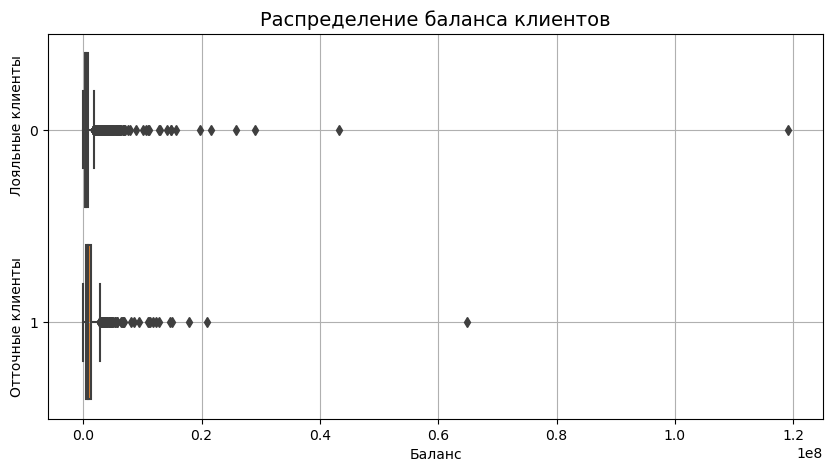

In [24]:
# Построим диаграмму размаха
plt.figure(figsize=(10, 5))

plt.title('Распределение баланса клиентов', fontsize = 14)
sns.boxplot(data = df, x ='balance', y ='churn', orient='h')
plt.ylabel('Отточные клиенты              Лояльные клиенты', fontsize = 10)
plt.xlabel('Баланс', fontsize = 10)

plt.grid(True)

*Из диаграммы размаха видно, что есть очень много аномально больших значений.
Отфильтруем данные баланса по перцентилям. 
Из диаграммы размаха видно, что при значении 90% полностью исчезают выбросы в категории отточных клиентов*

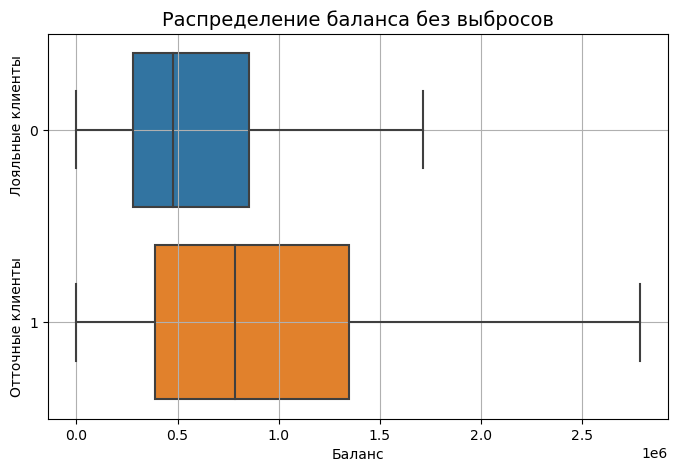

In [25]:
# Построим диаграмму размаха
plt.figure(figsize=(8, 5))


plt.title('Распределение баланса без выбросов', fontsize = 14)
sns.boxplot(x ='balance', 
            y ='churn', 
            data = df,
            showfliers=False,
            orient='h'
            )
plt.ylabel('Отточные клиенты              Лояльные клиенты', fontsize = 10)
plt.xlabel('Баланс', fontsize = 10)

plt.grid(True);

**10% - это большое количество данных, поэтому оставляем баланс без изменений**

**Аномалии в зарплате**

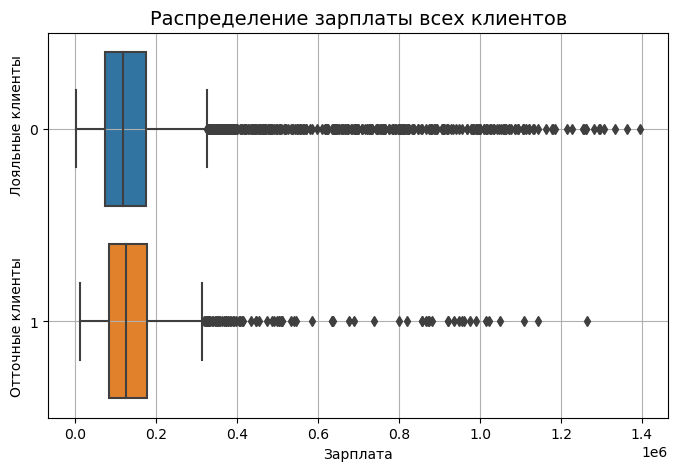

In [26]:
# Построим диаграмму размаха
plt.figure(figsize=(8, 5))

plt.title('Распределение зарплаты всех клиентов', fontsize = 14)
sns.boxplot(x ='salary', y ='churn', data = df, orient='h')
plt.ylabel('Категория', fontsize = 10)
plt.xlabel('Зарплата', fontsize = 10)
plt.ylabel('Отточные клиенты              Лояльные клиенты', fontsize = 10)

plt.grid(True);

*Отфильтруем данные зарплат по перцентилям. 
Из диаграммы размаха видно, что при значении 94% полностью исчезают выбросы в обеих категориях клиентов*

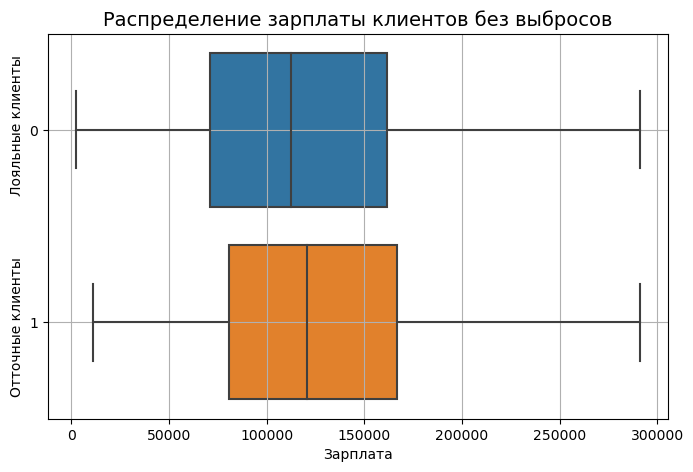

In [27]:
#уберём экстремальные значения
border = np.percentile(df[df['salary']>0]['salary'], 94)
salary_cut =df.query("salary < @border")

# Построим диаграмму размаха
plt.figure(figsize=(8, 5))

plt.title('Распределение зарплаты клиентов без выбросов', fontsize = 14)
sns.boxplot(x ='salary', y ='churn', data = salary_cut, orient='h')
plt.ylabel('Отточные клиенты              Лояльные клиенты', fontsize = 10)
plt.xlabel('Зарплата', fontsize = 10)

plt.grid(True);

**6% - это большое количество данных, поэтому оставляем данные без изменений**

# 2. Исследовательский анализ данных

**Разрез отточных клиентов для непрерывных данных**

**Возраст**

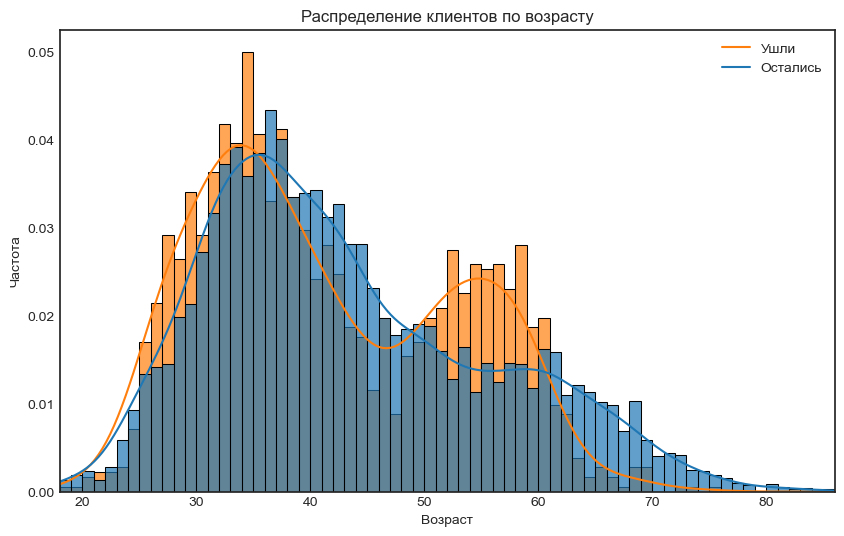

In [28]:
# назначаем стиль для графика с помощью matplotlib
plt.style.use('seaborn-white')
# указываем размер графика
plt.figure(figsize=(10,6))
# строим гистограмму 
sns.histplot(x='age'
             ,data=df
             ,hue = 'churn'
             ,alpha = 0.7
             ,kde=True
             ,common_norm=False
             ,stat='density'
             ,bins=68       
             )
# ограничиваем ось X 
plt.xlim(18, 86)

# указываем заголовок графика и подписи осей 
plt.title('Распределение клиентов по возрасту')
plt.xlabel('Возраст')
plt.ylabel('Частота')
plt.legend(['Ушли', 'Остались'])
# отображаем график на экране
plt.show()

- *Наблюдается увеличения оттока для групп в возрасте 25-35 лет, а также 50-60 лет.*
- *Лояльные клиенты находятся в группах 18-21, 36-50, а также 61+*

**Кредитный рейтинг**

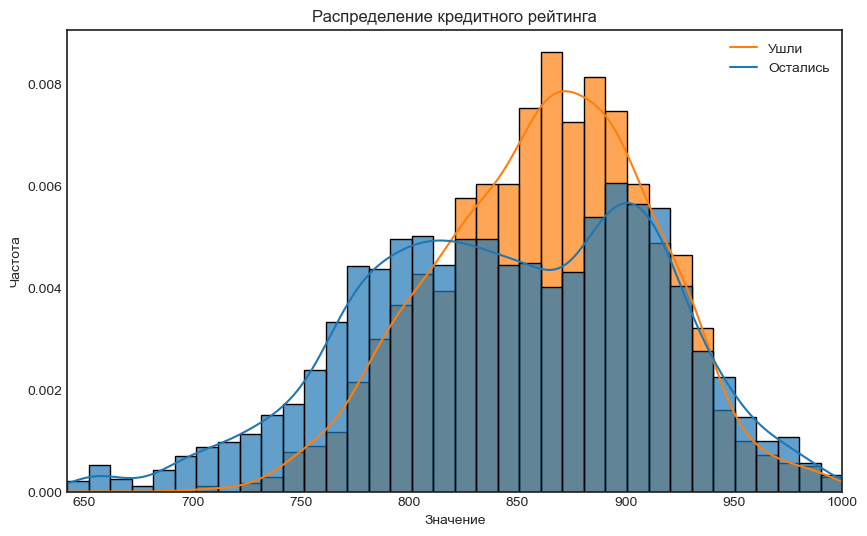

In [29]:
# назначаем стиль для графика с помощью matplotlib
plt.style.use('seaborn-white')
plt.figure(figsize=(10,6))
# строим гистограмму 
sns.histplot(x='score'
             ,data=df
             ,hue = 'churn'
             ,alpha = 0.7
             ,kde=True
             ,common_norm=False
             ,bins=36 
             ,stat='density')
# ограничиваем ось X для наглядности
plt.xlim(642, 1000)
# указываем заголовок графика и подписи осей средствами matplotlib
plt.title('Распределение кредитного рейтинга')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.legend(['Ушли', 'Остались'])
# отображаем график на экране
plt.show()

- *Наблюдается увеличение оттока у клиентов с кредитным рейтингом от 820 до 940. Есть пик в районе 860-870.*
- *У лояльных клиентов рейтинг от 600 до 820, а также 940 до 1000*

**Баланс**

*Так как баланс распределён неравномерно, то применим логарифмическую шкалу, чтобы охватить весь диапазон*

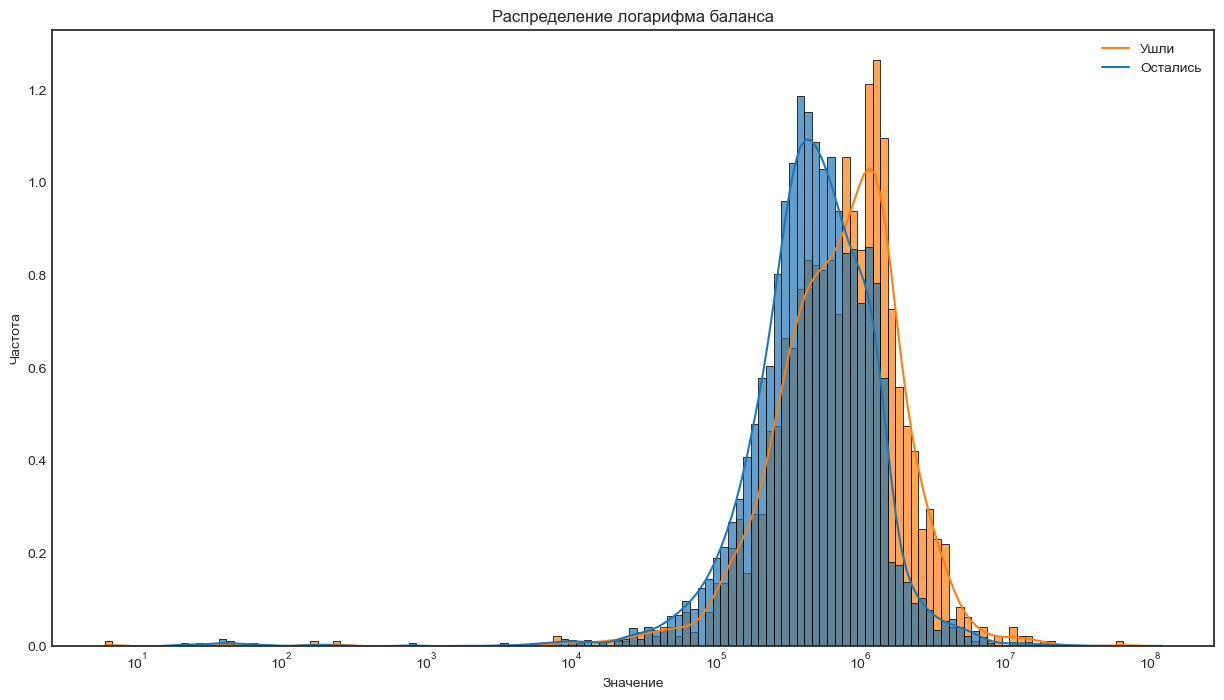

In [30]:
# назначаем классический стиль для графика с помощью matplotlib
plt.style.use('seaborn-white')
plt.figure(figsize=(15,8))
# строим гистограмму для столбца, добавив график кривой KDE
sns.histplot(data=df.query("balance > 0")
             ,x='balance'
             ,hue = 'churn'
             ,alpha = 0.7
             ,kde=True
             ,log_scale=True #добавим логарифмическое отображение
             ,common_norm=False
             ,stat='density')
# ограничиваем ось X для наглядности
#plt.xlim(0, 1000)
# указываем заголовок графика и подписи осей средствами matplotlib
plt.title('Распределение логарифма баланса')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.legend(['Ушли', 'Остались'])
# отображаем график на экране
plt.show()

*Видно увеличение оттока у клиентов с высоким балансом, начиная с 500 тыс.*

**Зарплата/поступления на счёт**

*Так как зарплата распределена неравномерно, то применим логарифмическую шкалу, чтобы охватить весь диапазон*

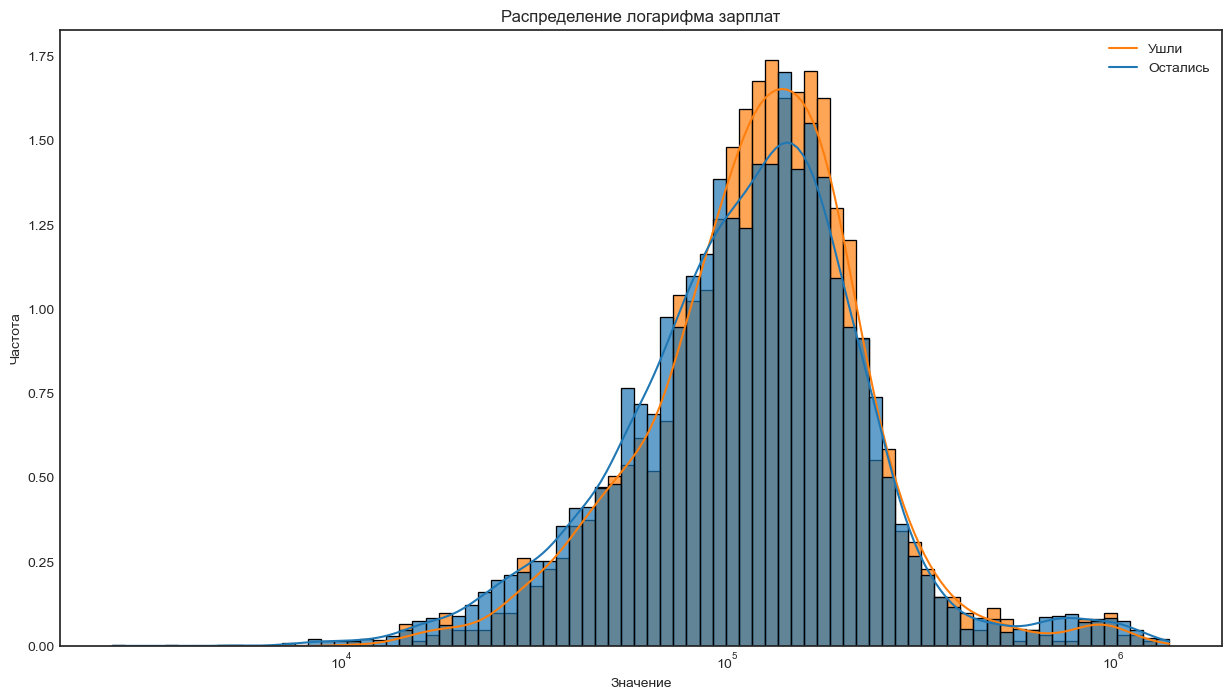

In [31]:
# назначаем классический стиль для графика с помощью matplotlib
plt.style.use('seaborn-white')
plt.figure(figsize=(15,8))
# строим гистограмму для столбца, добавив график кривой KDE
sns.histplot(data=df.query("salary > 0")
             ,x='salary'
             ,hue = 'churn'
             ,alpha = 0.7
             ,kde=True
             ,log_scale=True #добавим логарифмическое отображение
             ,common_norm=False
             ,stat='density')
# ограничиваем ось X для наглядности

# указываем заголовок графика и подписи осей средствами matplotlib
plt.title('Распределение логарифма зарплат')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.legend(['Ушли', 'Остались'])
# отображаем график на экране
plt.show()

*Видно, увеличение оттока клиентов начиная с зарплаты около 100 тыс. Рассмотрим этот диапазон подробнее в нормальной шкале. Сделаем срез по 95% перцентили*

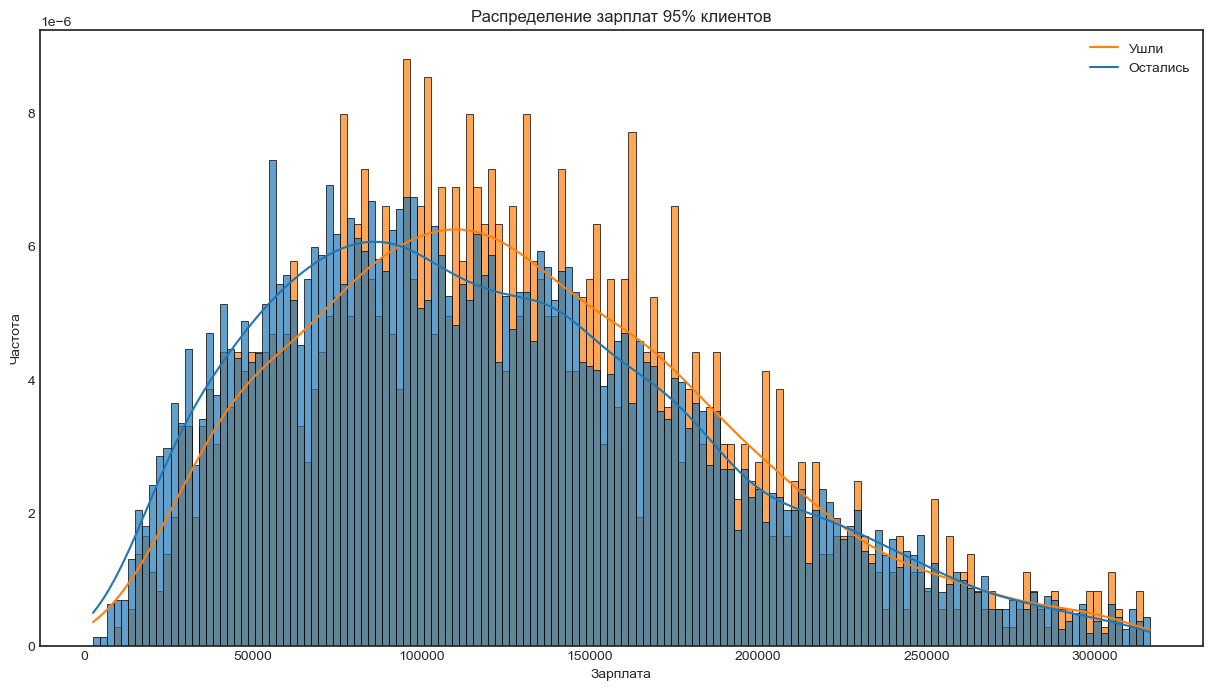

In [32]:
border = np.percentile(df[df['salary']>0]['salary'], 95)
salary_95 =df.query("salary < @border")

# назначаем классический стиль для графика с помощью matplotlib
plt.style.use('seaborn-white')
plt.figure(figsize=(15,8))
# строим гистограмму для столбца, добавив график кривой KDE
sns.histplot(data=salary_95 # задаём срез 
             ,x='salary'
             ,hue = 'churn'
             ,alpha = 0.7
             ,kde=True
             
             ,common_norm=False
             ,stat='density'
             ,bins=150)
# ограничиваем ось X для наглядности
#plt.xlim(0, 1000)
# указываем заголовок графика и подписи осей средствами matplotlib
plt.title('Распределение зарплат 95% клиентов')
plt.xlabel('Зарплата')
plt.ylabel('Частота')
plt.legend(['Ушли', 'Остались'])
# отображаем график на экране
plt.show()

- *После уточнения видно, увеличение оттока клиентов начиная с зарплаты около 75 тыс.*
- *Лояльные клиенты находятся в диапазоне до 75 тыс.*

**Категориальные признаки у отточных и лояльных клиентов**

In [33]:
# выделим категории в отдельный список
categories = ['city','gender','equity','products','credit_card','last_activity']

# пройдёмся по каждому элементу и создадим сводную таблицу, где index-переменная списка
for item in categories:
    churn = df.pivot_table(index = item, values = 'churn', aggfunc = ['sum','count'])
    #дропнем лишние названия колонок
    churn.columns = churn.columns.droplevel(level=1)
    #переведём доли в проценты
    churn['churn %'] = 100*(churn['sum']/churn['count']).round(3)
    
    #отсортируем по убыванию
    churn=churn.sort_values(by='churn %', ascending=False)
    display(churn)

,sum,count,churn %
city,,,
Ярославль,1117,5873,19.0
Ростов,265,1416,18.7
Рыбинск,436,2682,16.3


,sum,count,churn %
gender,,,
М,1183,4989,23.7
Ж,635,4982,12.7


,sum,count,churn %
equity,,,
9,7,13,53.8
7,37,80,46.2
6,58,161,36.0
8,6,17,35.3
5,576,1915,30.1
4,464,1847,25.1
3,321,1540,20.8
2,166,1050,15.8
1,93,773,12.0


,sum,count,churn %
products,,,
4,300,474,63.3
5,8,19,42.1
3,297,1038,28.6
2,978,5117,19.1
1,235,3323,7.1


,sum,count,churn %
credit_card,,,
0,815,3189,25.6
1,1003,6782,14.8


,sum,count,churn %
last_activity,,,
1,1277,5214,24.5
0,541,4757,11.4


**Вывод:**

+ **city** - Самый большой отток наблюдается в Ярославле 19%, затем идёт Ростов 18,7%. Меньше всего отток в Рыбинске 16,3%.
+ **gender** - Доля отточных мужчин почти в 2 раза больше женщин и равна 23.7%.
+ **equity** - Репрезентативной выборкой можно считать количество объектов 0-5, т.к клиентов с продуктами 6 - 9 очень мало в каждой категории, меньше 60. Отток клиентов увеличивается с ростом количества объектов. Наибольший отток у клиентов с 5 объектами.
+ **products** - Наибольший отток наблюдается у клиентов с 4 продуктами 63,3% и уменьшается по мере уменьшения количества продуктов.
+ **credit_card** - Отток клиентов без кредитной карты почти в 2 раза выше, чем с кредиткой, и составляет 25,6%.
+ **last_activity** - Наибольший отток наблюдается у клиентов, кто проявлял активность в последний месяц 24,5%.


**Портреты отточных клиентов и лояльных клиентов**

*Выделим признаки, которые более характерны для лояльных и отточных клиентов*

In [34]:
val= [['Объекты','0-2','3-9'],\
      ['Продукты банка','1','2-4'],\
      ['Последняя активность','нет','да'],\
      ['Кредитный рейтинг','600-820 и 940-1000','820-940'],\
      ['Пол','Женщины','Мужчины'],\
      ['Кредитка','да','нет'],\
      ['Возраст','18-21, 36-50, 61+','25-35, 50-60'],\
      ['Зарплата','до 75 тыс.','выше 75 тыс.'],\
      ['Баланс','до 500 тыс.','выше 500 тыс.'],\
      ['Город','Рыбинск','Ярославль']]
     
comparing = pd.DataFrame(val, columns=['Признак','Лояльный клиент','Отточный клиент'])

comparing

,Признак,Лояльный клиент,Отточный клиент
0,Объекты,0-2,3-9
1,Продукты банка,1,2-4
2,Последняя активность,нет,да
3,Кредитный рейтинг,600-820 и 940-1000,820-940
4,Пол,Женщины,Мужчины
5,Кредитка,да,нет
6,Возраст,"18-21, 36-50, 61+","25-35, 50-60"
7,Зарплата,до 75 тыс.,выше 75 тыс.
8,Баланс,до 500 тыс.,выше 500 тыс.
9,Город,Рыбинск,Ярославль


**Корреляция показателей**

In [35]:
df.describe()

,user,score,age,equity,balance,products,credit_card,last_activity,salary,churn,женщины,мужчины,Ростов,Рыбинск,Ярославль
count,9971.000000,9971.000000,9971.000000,9971.000000,7.693000e+03,9971.000000,9971.000000,9971.000000,9.971000e+03,9971.000000,9971.000000,9971.000000,9971.000000,9971.000000,9971.000000
mean,171759.144218,848.686691,42.735533,2.631130,8.274607e+05,1.871628,0.680173,0.522916,1.478199e+05,0.182329,0.499649,0.500351,0.142012,0.268980,0.589008
std,33698.839802,65.387934,12.171738,1.980074,1.980540e+06,0.792624,0.466433,0.499500,1.392930e+05,0.386135,0.500025,0.500025,0.349080,0.443452,0.492038
min,94561.000000,642.000000,18.000000,0.000000,6.000000e+00,1.000000,0.000000,0.000000,2.546300e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,142744.000000,802.000000,33.000000,0.000000,2.959639e+05,1.000000,0.000000,0.000000,7.525586e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,172651.000000,853.000000,40.000000,3.000000,5.244177e+05,2.000000,1.000000,1.000000,1.196547e+05,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,201166.000000,900.000000,51.000000,4.000000,9.807058e+05,2.000000,1.000000,1.000000,1.745011e+05,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,229145.000000,1000.000000,86.000000,9.000000,1.191136e+08,5.000000,1.000000,1.000000,1.395064e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [36]:
df_sorted = df.drop(['user','city','gender'], axis=1)
# get the phi_k correlation matrix between all variables
df_phik = df_sorted.phik_matrix()
df_phik

interval columns not set, guessing: ['score', 'age', 'equity', 'balance', 'products', 'credit_card', 'last_activity', 'salary', 'churn', 'женщины', 'мужчины', 'Ростов', 'Рыбинск', 'Ярославль']


,score,age,equity,balance,products,credit_card,last_activity,salary,churn,balance_nan,женщины,мужчины,Ростов,Рыбинск,Ярославль
score,1.000000,0.037396,0.527343,0.170882,0.418574,0.208194,0.053247,0.395462,0.228059,0.753766,0.070650,0.070650,0.086196,0.029380,0.084911
age,0.037396,1.000000,0.042385,0.024957,0.140926,0.156464,0.089671,0.358020,0.183339,0.049021,0.285535,0.285535,0.068739,0.058761,0.097727
equity,0.527343,0.042385,1.000000,0.000000,0.583427,0.221292,0.050642,0.285611,0.352056,0.975754,0.063446,0.063446,0.064388,0.000000,0.054833
balance,0.170882,0.024957,0.000000,1.000000,0.000000,0.000000,0.000000,0.374365,0.024660,NaN,0.045464,0.045464,0.000000,0.023181,0.047941
products,0.418574,0.140926,0.583427,0.000000,1.000000,0.271099,0.112825,0.222285,0.259853,0.491171,0.071824,0.071824,0.044997,0.085363,0.108476
credit_card,0.208194,0.156464,0.221292,0.000000,0.271099,1.000000,0.049564,0.038498,0.201876,0.244840,0.195452,0.195452,0.152098,0.076576,0.178121
last_activity,0.053247,0.089671,0.050642,0.000000,0.112825,0.049564,1.000000,0.044931,0.262598,0.041666,0.012979,0.012979,0.000000,0.074427,0.074964
salary,0.395462,0.358020,0.285611,0.374365,0.222285,0.038498,0.044931,1.000000,0.048883,0.429821,0.144222,0.144222,0.136003,0.101295,0.175677
churn,0.228059,0.183339,0.352056,0.024660,0.259853,0.201876,0.262598,0.048883,1.000000,0.381290,0.220289,0.220289,0.000000,0.045662,0.034457
balance_nan,0.753766,0.049021,0.975754,NaN,0.491171,0.244840,0.041666,0.429821,0.381290,1.000000,0.097426,0.097426,0.093152,0.016844,0.086749


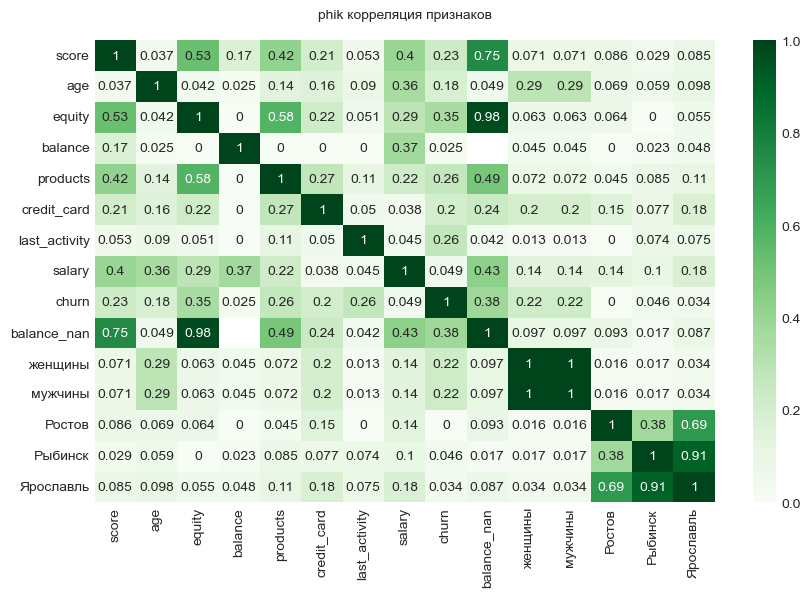

In [37]:
#Построим тепловую карту
plt.figure(figsize=(10, 6)) 
heatmap = sns.heatmap(df_phik, vmin=0, vmax=1, annot=True, cmap='Greens') 

heatmap.set_title('phik корреляция признаков', fontdict={'fontsize':10}, pad=16);

**Срез матрицы корреляции по признаку оттока клиентов churn**

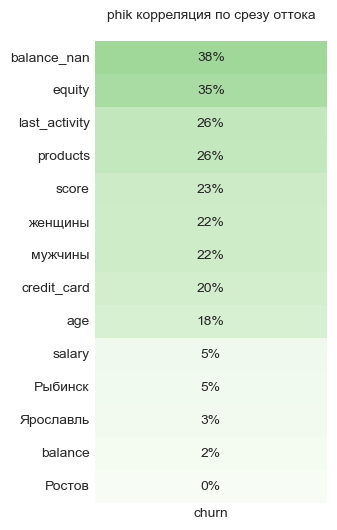

In [38]:
df_phik_churn = df_phik[['churn']].drop(['churn']).sort_values(by='churn', ascending=False)

#Построим тепловую карту
plt.figure(figsize=(3, 6)) 
heatmap = sns.heatmap(df_phik_churn, vmin=0, vmax=1, annot=True, cmap='Greens', fmt='.0%', cbar=False) 

heatmap.set_title('phik корреляция по срезу оттока', fontdict={'fontsize':10}, pad=16);

plt.show()

**Вывод**

*Наибольшая взаимосвязь с оттоком клиентов связана со следующими признаками:*
- Пропуски в балансе
- Количество объектов в собственности
- Последняя активность
- Количество банковских продуктов
- Кредитный рейтинг
- Пол
- Наличие кредитной карты
- Возраст

# 3. Проверка статистических гипотез

**Гипотеза №1 о влиянии количества продуктов на отток клиентов банка**

In [39]:
#выделим группы
prod_stay = df.query('churn == 0')['products']
prod_churn = df.query('churn == 1')['products']

print("Описание лояльных клиентов \n", prod_stay.describe(), "\n")
print("Описание отточных клиентов \n",prod_churn.describe(), "\n")

Описание лояльных клиентов 
 count    8153.000000
mean        1.758862
std         0.713490
min         1.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         5.000000
Name: products, dtype: float64 

Описание отточных клиентов 
 count    1818.000000
mean        2.377338
std         0.922162
min         1.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         5.000000
Name: products, dtype: float64 



*Видим, что выборки имеют разный размер и средн значения. Для проведения t-testa нужно, чтобы дисперсии были близки*

In [40]:
print('Дисперсия лояльных клиентов:', np.var(prod_stay, ddof=1))
print('Стандартное отклонение:', np.sqrt(np.var(prod_stay, ddof=1)), "\n")

print('Дисперсия отточных клиентов:', np.var(prod_churn, ddof=1))
print('Стандартное отклонение отточныш клиентов:', np.sqrt(np.var(prod_churn, ddof=1)), "\n")

Дисперсия лояльных клиентов: 0.5090679878818808
Стандартное отклонение: 0.7134900054533916 

Дисперсия отточных клиентов: 0.8503832221416862
Стандартное отклонение отточныш клиентов: 0.9221622536960001 



- *Нулевая гипотеза H0:* статистическая значимость в среднем количестве продуктов между отточными и лояльными клиентами незначительна и сделать вывод о различии нельзя
- *Альтернативная гипотеза H1:* статистическая значимость в среднем количестве продуктов между отточными и лояльными клиентами значительна и выборки различаются.
- Критический уровень статистической значимости alpha = 0.05
- Если p-value < alpha, то отвергаем нулевую гипотезу.

In [41]:
# формируем таблицу сопряженности
contingency_table = df.pivot_table(index='products', columns='churn', values='user', aggfunc='count')
contingency_table

churn,0,1
products,,
1,3088,235
2,4139,978
3,741,297
4,174,300
5,11,8


In [42]:
# выполняем тест на независимость 

chi_sq_stat, p_value, degree_of_freedoom, expected_values = chi2_contingency(contingency_table.values)
alpha = 0.05

#вывод P-value
print('Pvalue chi2_contingency:', p_value)
if p_value < alpha:
    print('Отвергаем нулевую гипотезу: есть статистически значимая разница между отточными и лояльными клиентами')
else:
    print('Не получилось отвергнуть нулевую гипотезу, различий между группами не выявлено')

Pvalue chi2_contingency: 6.3282396961087e-217
Отвергаем нулевую гипотезу: есть статистически значимая разница между отточными и лояльными клиентами


**Гипотеза №2 различие среднего возраста у отточных и лояльных клиентов**

In [43]:
#выделим группы
obj_stay = df.query('churn == 0')['age']
obj_churn = df.query('churn == 1')['age']

print("Описание лояльных клиентов \n", obj_stay.describe(), "\n")
print("Описание отточных клиентов \n",obj_churn.describe(), "\n")

Описание лояльных клиентов 
 count    8153.000000
mean       43.026739
std        12.370994
min        18.000000
25%        34.000000
50%        40.000000
75%        51.000000
max        86.000000
Name: age, dtype: float64 

Описание отточных клиентов 
 count    1818.000000
mean       41.429593
std        11.144754
min        18.000000
25%        32.000000
50%        39.000000
75%        52.000000
max        75.000000
Name: age, dtype: float64 



In [44]:
print('Дисперсия лояльных клиентов:', np.var(obj_stay, ddof=1))
print('Стандартное отклонение:', np.sqrt(np.var(obj_stay, ddof=1)), "\n")

print('Дисперсия отточных клиентов:', np.var(obj_churn, ddof=1))
print('Стандартное отклонение отточных клиентов:', np.sqrt(np.var(obj_churn, ddof=1)), "\n")

Дисперсия лояльных клиентов: 153.04148319185774
Стандартное отклонение: 12.370993621850175 

Дисперсия отточных клиентов: 124.2055519531032
Стандартное отклонение отточных клиентов: 11.144754459076395 



*Видим, что значения дисперсий и стандартного отклонения различаются. Здесь применим t-критерий Уэлча.*

- *Нулевая гипотеза H0:* статистическая значимость в среднем возрасте между отточными и лояльными клиентами незначительна и сделать вывод о различии нельзя
- *Альтернативная гипотеза H1:* статистическая значимость в среднем возрасте между отточными и лояльными клиентами значительна и выборки различаются.
- Критический уровень статистической значимости alpha = 0.05
- Если p-value < alpha, то отвергаем нулевую гипотезу.

In [45]:
#Критический уровень статистической значимости 
alpha = 0.05
#результаты стат теста
results = stats.ttest_ind(obj_stay, obj_churn, equal_var=False)

#вывод P-value
print('P-value:',results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: есть статистически значимая разница между отточными и лояльными клиентами')
else:
    print('Не получилось отвергнуть нулевую гипотезу, различий между группами не выявлено')

P-value: 6.740242116187057e-08
Отвергаем нулевую гипотезу: есть статистически значимая разница между отточными и лояльными клиентами


**Гипотеза №3 различие среднего кредитного рейтинга у отточных и лояльных клиентов**

In [46]:
#выделим группы
df_stay = df.query('churn == 0')['score']
df_churn = df.query('churn == 1')['score']

print("Описание лояльных клиентов \n", df_stay.describe(), "\n")
print("Описание отточных клиентов \n",df_churn.describe(), "\n")

Описание лояльных клиентов 
 count    8153.000000
mean      845.414326
std        67.988487
min       642.000000
25%       796.000000
50%       848.000000
75%       900.000000
max      1000.000000
Name: score, dtype: float64 

Описание отточных клиентов 
 count    1818.000000
mean      863.361936
std        49.580696
min       706.000000
25%       828.000000
50%       866.000000
75%       898.000000
max      1000.000000
Name: score, dtype: float64 



- *Нулевая гипотеза H0:* статистическая значимость в среднем кредитном рейтинге между отточными и лояльными клиентами незначительна и сделать вывод о различии нельзя
- *Альтернативная гипотеза H1:* статистическая значимость в среднем кредитном рейтинг между отточными и лояльными клиентами значительна и выборки различаются.
- Критический уровень статистической значимости alpha = 0,05
- Если p-value < alpha, то отвергаем нулевую гипотезу.

In [47]:
#Критический уровень статистической значимости 
alpha = alpha

results = stats.ttest_ind(df_stay, df_churn, equal_var=False)

#вывод P-value
print('P-value:',results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: есть статистически значимая разница между отточными и лояльными клиентами')
else:
    print('Не получилось отвергнуть нулевую гипотезу, различий между группами не выявлено')

P-value: 1.5549312615343554e-37
Отвергаем нулевую гипотезу: есть статистически значимая разница между отточными и лояльными клиентами


**Гипотеза №4 различие среднего возраста у клиентов с 1 продуктом и 2 продуктами**

In [48]:
#выделим группы
one_prod_age = df.query('products == 1')['age']
two_prod_age = df.query('products == 2')['age']

print("Описание клиентов с 1 продуктом\n", one_prod_age.describe(), "\n")
print("Описание отточных с 2 продуктоми \n",two_prod_age.describe(), "\n")

Описание клиентов с 1 продуктом
 count    3323.000000
mean       42.196208
std        11.986899
min        18.000000
25%        33.000000
50%        40.000000
75%        49.500000
max        86.000000
Name: age, dtype: float64 

Описание отточных с 2 продуктоми 
 count    5117.000000
mean       42.778190
std        12.150889
min        18.000000
25%        33.000000
50%        40.000000
75%        52.000000
max        84.000000
Name: age, dtype: float64 



In [49]:
print('Дисперсия клиентов с 1 продуктом:', np.var(one_prod_age, ddof=1))
print('Стандартное отклонение:', np.sqrt(np.var(one_prod_age, ddof=1)), "\n")

print('Дисперсия клиентов с 2 продуктоми:', np.var(two_prod_age, ddof=1))
print('Стандартное отклонение:', np.sqrt(np.var(two_prod_age, ddof=1)), "\n")

Дисперсия клиентов с 1 продуктом: 143.6857532281444
Стандартное отклонение: 11.986899233252291 

Дисперсия клиентов с 2 продуктоми: 147.64410595046945
Стандартное отклонение: 12.15088910123327 



*Видим, что выборки различаются по количеству, дисперсия и стандартное отклонение близки. Здесь также применим t-критерий Уэлча.*

In [50]:
# у нас второе измерение по колонке age, поэтому корректируем коэффициент alpha
alpha_2 = 1 - (1 - 0.05)**(1 / 2)
print('Скорректированный критерий alpha:',alpha_2)

Скорректированный критерий alpha: 0.025320565519103666


*Формулируем гипотезы*

- *Нулевая гипотеза H0:* статистическая значимость в среднем возрасте между клиентами с одним продуктом и клиентами с двумя продуктами незначительна и сделать вывод о различии нельзя
- *Альтернативная гипотеза H1:* статистическая значимость в среднем возрасте между клиентами с одним продуктом и клиентами с двумя продуктами значительна и выборки различаются.
- Критический уровень статистической значимости alpha = alpha_2 скорректированный по методу Шидака
- Если p-value < alpha, то отвергаем нулевую гипотезу.

In [51]:
#Критический уровень статистической значимости 
alpha = alpha_2

results = stats.ttest_ind(one_prod_age, two_prod_age, equal_var=False)

#вывод P-value
print('P-value:',results.pvalue)

if results.pvalue < alpha_2:
    print('Отвергаем нулевую гипотезу: есть статистически значимая разница между отточными и лояльными клиентами')
else:
    print('Не получилось отвергнуть нулевую гипотезу, различий между группами не выявлено')

P-value: 0.030228548932668114
Не получилось отвергнуть нулевую гипотезу, различий между группами не выявлено


**Вывод**

*Стат тесты подтвердили, что есть статистически значимая разница у лояльных и отточных клиентов в зависимости от параметров:*

- количества продуктов банка,
- возраста клентов,
- кредитного рейтинга.


*Статистически показано, что нет разницы в выборках:*

- в возрасте клиентов с одним продуктом и клиентов с двумя продуктами.

# 4. Промежуточный итог. Выбор показателей, по которым строить сегменты.

*Наибольшая корреляция была выявлена в следующих признаках:*

- Количество объектов в собственности
- Последняя активность
- Количество банковских продуктов
- Кредитный рейтинг
- Пол
- Наличие кредитной карты
- Возраст

**Диапазон ключевых показателей с корреляцией по оттоку клиентов**

In [52]:
comparing.iloc[:7]

,Признак,Лояльный клиент,Отточный клиент
0,Объекты,0-2,3-9
1,Продукты банка,1,2-4
2,Последняя активность,нет,да
3,Кредитный рейтинг,600-820 и 940-1000,820-940
4,Пол,Женщины,Мужчины
5,Кредитка,да,нет
6,Возраст,"18-21, 36-50, 61+","25-35, 50-60"


# 5. Сегментация на основе выделенных показателей.

**Сегмент 1**

- Кредитный рейтинг 600-820 (интервал лояльного клиента)
- Возраст 36-50 (интервал лояльного клиента)
- Нет кредитной карты credit_card = 0 (отточный признак)
- средний возраст 42
- мужчин 39%, женщин 61%
- уровень оттока 7,7%
- средняя зарплата 135 т.р.

In [53]:
#запишем ключевые параметры в список
col = ['user','score','age','equity','products','credit_card','last_activity','женщины','мужчины','churn','salary','balance']

In [54]:
#Сделаем срез 
seg_one = df.query(" score < 820 and age >= 36 and age <= 50 and credit_card==0")

#выведем часть описания данных: размер выборки, среднюю и медиану
seg_one[col].describe().iloc[[0,1,5]]

,user,score,age,equity,products,credit_card,last_activity,женщины,мужчины,churn,salary,balance
count,360.000000,360.000000,360.000000,360.000000,360.000000,360.0,360.000000,360.000000,360.000000,360.000000,360.000000,357.000000
mean,170834.261111,785.733333,42.158333,2.927778,2.230556,0.0,0.544444,0.608333,0.391667,0.077778,134399.390361,585916.911373
50%,171601.000000,787.500000,41.500000,3.000000,2.000000,0.0,1.000000,1.000000,0.000000,0.000000,129179.815000,449414.280000


**Рекомендация по сегменту 1**

- Предложить кредитную карту с льготным периодом, это позволит увеличить расходы и повысить лояльность.

**Сегмент 2**

- Кредитный рейтинг 940-1000 (интервал лояльного клиента)
- Количество объектов >2 (интервал отточного клиента)
- средний возраст 40,8
- мужчин 55%, женщин 45%
- уровень оттока 25%
- кредитка есть у 61%
- средняя зарплата 279 т.р.

In [55]:
#Сделаем срез 
seg_two = df.query("score >= 940 and equity > 2")

#выведем часть описания данных: размер выборки, среднюю и медиану
seg_two[col].describe().iloc[[0,1,5]]

,user,score,age,equity,products,credit_card,last_activity,женщины,мужчины,churn,salary,balance
count,294.00000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,2.940000e+02
mean,174309.02381,963.258503,43.741497,4.306122,2.221088,0.615646,0.513605,0.445578,0.554422,0.255102,279607.180714,3.093526e+06
50%,178311.50000,961.000000,41.000000,4.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,184942.835000,1.725983e+06


**Рекомендация по сегменту 2**

- Предложить повышенный кэшбэк по кредитной карте на путешествия (высокая зарплата) и бронирование отелей.
- Предложить программу страхования объектов недвижимости.

**Сегмент 3**

- Кредитный рейтинг 820-940 (интервал отточного клиента)
- Возраст 25-35 (интервал отточного клиента)
- Количество объектов >4 (интервал отточного клиента)
- Пол:мужчина (интервал отточного клиента)
- уровень оттока 54%
- кредитка есть у 64%
- средняя зарплата 132 т.р.

In [56]:
#Сделаем срез 
seg_three = df.query(" score > 820 and score < 940 and age >= 25 and age <= 35 and equity > 4 and мужчины == 1")

#выведем часть описания данных: размер выборки, среднюю и медиану
seg_three[col].describe().iloc[[0,1,5]]

,user,score,age,equity,products,credit_card,last_activity,женщины,мужчины,churn,salary,balance
count,300.000000,300.000000,300.00,300.00,300.000000,300.000000,300.00,300.0,300.0,300.000000,300.000000,300.000000
mean,171279.876667,880.493333,30.78,5.18,2.283333,0.646667,0.58,0.0,1.0,0.546667,132528.819433,891128.063833
50%,171120.500000,882.500000,31.00,5.00,2.000000,1.000000,1.00,0.0,1.0,1.000000,100397.510000,701752.935000


**Рекомендация по сегменту 3**

- Предложить повышенный кэшбэк по категориям для мужчин: спорт, рестораны, билеты.
- Предложить программу страхования объектов недвижимости.

# 6. Выводы и рекомендации для заказчика. 

**1. Изучено влияние параметров клиентов на их отток. Наибольшая взаимосвязь была выявлена в следующих признаках:**
    
- Количество объектов в собственности
- Последняя активность
- Количество банковских продуктов
- Кредитный рейтинг
- Пол
- Наличие кредитной карты
- Возраст

**2. Были выделены интервалы для лояльных и отточных клиентов**

In [57]:
comparing.iloc[:7]

,Признак,Лояльный клиент,Отточный клиент
0,Объекты,0-2,3-9
1,Продукты банка,1,2-4
2,Последняя активность,нет,да
3,Кредитный рейтинг,600-820 и 940-1000,820-940
4,Пол,Женщины,Мужчины
5,Кредитка,да,нет
6,Возраст,"18-21, 36-50, 61+","25-35, 50-60"


**3. Стат тесты подтвердили, что есть статистически значимая разница у лояльных и отточных клиентов в зависимости от ключевых признаков:**
- количества банковских продуктов,
- возраста клентов,
- кредитного рейтинга.

**4. Клиенты были разделены на 3 сегмента и каждому дана рекомендация**

**Сегмент 1**

- Кредитный рейтинг 600-820 (интервал лояльного клиента)
- Возраст 36-50 (интервал лояльного клиента)
- Нет кредитной карты credit_card = 0 (отточный признак)
- средний возраст 42
- мужчин 39%, женщин 61%
- уровень оттока 7,7%
- средняя зарплата 135 т.р.

**Рекомендация по сегменту 1**

- Предложить кредитную карту с льготным периодом, это позволит увеличить расходы и повысить лояльность.

###### **Сегмент 2**

- Кредитный рейтинг 940-1000 (интервал лояльного клиента)
- Количество объектов >2 (интервал отточного клиента)
- средний возраст 40,8
- мужчин 55%, женщин 45%
- уровень оттока 25%
- кредитка есть у 61%
- средняя зарплата 279 т.р.

**Рекомендация по сегменту 2**

- Предложить повышенный кэшбэк по кредитной карте на путешествия (высокая зарплата) и бронирование отелей.
- Предложить программу страхования объектов недвижимости.

**Сегмент 3**

- Кредитный рейтинг 820-940 (интервал отточного клиента)
- Возраст 25-35 (интервал отточного клиента)
- Количество объектов >4 (интервал отточного клиента)
- Пол:мужчина (интервал отточного клиента)
- уровень оттока 54%
- кредитка есть у 64%
- средняя зарплата 132 т.р.

**Рекомендация по сегменту 3**

- Предложить повышенный кэшбэк по категориям для мужчин: спорт, рестораны, билеты.
- Предложить программу страхования объектов недвижимости.

**Презентация для отдела маркетинга**

https://disk.yandex.ru/i/eAXAkwOIkaG4Tw

**Ссылка на дашборд**

https://public.tableau.com/app/profile/nick.mose/viz/bank_churn_mnn_11aug23/Dashboard1?publish=yes